In [2]:
from math import exp
import numpy
from matplotlib import pyplot as plt

In [209]:
lam = 0.948747
phi = 0.764448
V_0 = 0.825076
E_0 = 0.987657
V_00 = 1 / 1.76
density_0 = 1.76
a = 0.23
b = 2.5
Z = -0.8066
Gamma_0 = 1.22
Q = 0.0571
V_0s = 1/1.76
w = 0.28
rho=1
A= -5.5524 * rho*rho + 17.714 * rho - 7.7969
B = -0.6198 * rho*rho*rho + 2.09 * rho*rho - 2.0878 * rho + 0.754
R1 = -0.4911 * rho*rho - 1.6304 * rho + 8.8185
R2 = -0.8716 * rho*rho*rho + 2.6773 * rho*rho - 3.2307 * rho + 3.3637

In [223]:

V_s=numpy.linspace(14,16.1,num=100000)
#V_s = 0.654484231545955
y = 1 - phi*V_s / V_00
x=4.0 * b * y
P_i = a * a * density_0 * (numpy.exp(x) -1)/ (4.0 * b)
E_i = a * a * (numpy.exp(x)-1) / (16.0 * b * b) + density_0 * a * a * (phi*V_s - V_00) / (4.0 * b) + Q
E_s = 5.423618
Gamma = Gamma_0 + Z * y
P_s = phi*(P_i + Gamma * (E_s - E_i) / (phi*V_s))
dPs = phi*phi*(- a * a * density_0 * density_0 * numpy.exp(4.0 * b * y) + Gamma * P_i / (phi*V_s) - (Gamma_0 + Z) * (P_s - P_i) / (Gamma * phi*V_s))

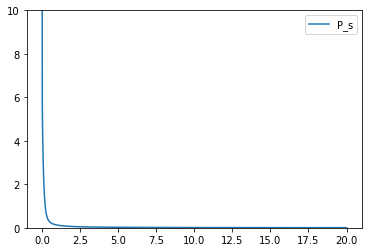

In [226]:
#V_g = (V_0 - (1 - lam) * V_s ) / lam
#E_g = (E_0 - (1 - lam) * E_s) / lam

V_g=numpy.linspace(0.0001,20,num=100000)
#V_g = 1.539425933785942

P_g = A * (1 - w * V_0s / (R1 * V_g)) * numpy.exp(-R1 * V_g / V_0s) + B * (1 - w * V_0s / (R2 * V_g)) * numpy.exp(-R2 * V_g / V_0s) + w * E_g * V_0s / V_g
P1 = A * (w * V_0s / (R1 * V_g * V_g) + w / V_g - R1 / V_0s) * numpy.exp(-R1 * V_g / V_0s)
P2 = B * (w * V_0s / (R2 * V_g * V_g) + w / V_g - R2 / V_0s) * numpy.exp(-R2 * V_g / V_0s)
dPg = P1 + P2 - w * E_g * V_0s / (V_g * V_g)

diff = P_s - P_g
#ddiff = dPs-dPg
#plt.plot(V_g,P_g)
#plt.plot(V_s,P_s)
plt.plot(V_g,P_g)
#plt.plot(V_s,diff)
plt.ylim([0,10])
plt.legend(['P_s','P_g','diff'])
plt.show()

